# Data Science z Python 3.10. Optymalizator, funkcja straty i early stopping
## 🇬🇧 Data Science with Python 3.10. Optimizer, loss function and early stopping
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

Poniżej przedstawiony jest kod znany z poprzednich zajęć. Tym razem wprowadzimy do niego "ulepszenia" i zastanowimy się nad właściwym optymalizatorem i funkcją straty. Wprowadzimy również do naszego modelu podstawowy Early Stopping, który będzie zapobiegać przeuczeniu się naszego modelu.

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [ ]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Zatrzymajmy się na chwilę w tym miejscu. Na ostatnich zajęciach modyfikowaliśmy architekturę sieci neuronowej. Teraz przyszedł czas na wybór odpowiedniego optymalizatora, metryk oraz funkcji straty.

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

Epoch 1/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9926
Epoch 1: val_accuracy improved from -inf to 0.97340, saving model to model
INFO:tensorflow:Assets written to: model/assets
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.1450 - val_accuracy: 0.9734
Epoch 2/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9921
Epoch 2: val_accuracy did not improve from 0.97340
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 0.1491 - val_accuracy: 0.9716
Epoch 3/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9930
Epoch 3: val_accuracy did not improve from 0.97340
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.1465 - val_accuracy: 0.9734
Epoch 4/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.0229

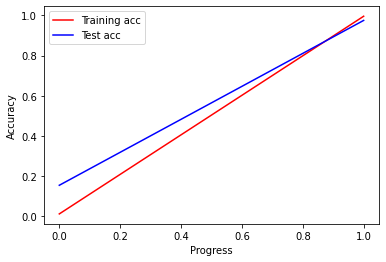

In [ ]:
#1
f1 = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=10)

#2
f2 = ModelCheckpoint('model', monitor="val_accuracy", mode='max', verbose=1, save_best_only= True)

#3
history = model.fit(train_images, to_categorical(train_labels), batch_size = 32, validation_data=(test_images, to_categorical(test_labels)), epochs=100, verbose=1, callbacks=[f1, f2])
# batch size to liczba przez którą dzielony jest nasz zbiór (np. u na 60.000 / 32 = 1875)

#4
trained_model = load_model('model')

#5
train_accuracy = trained_model.evaluate(train_images, to_categorical(train_labels), verbose = 0)

#6
test_accuracy = trained_model.evaluate(test_images, to_categorical(test_labels), verbose = 0)

#8
print("Train acc: {tra}, Test acc: {tsa}".format(tra = train_accuracy, tsa = test_accuracy))
#9

pyplot.plot(train_accuracy, 'r', label='Training acc')
pyplot.plot(test_accuracy, 'b', label='Test acc')
pyplot.xlabel('Progress')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()


### 📚 Zadanie 1.
##### Przeprowadź proces uczenia się z wykorzystaniem early stopping, wykonaj poniższe kroki.
##### Train the neural network using early stopping, follow the steps below.

1. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do early stopping, wprowadź odpowiednie wartości (takie jakie chcesz, tylko dla zmiennej patience wprowadź "10"), do parametrów takich jak monitor, mode, verbose oraz patience.
2. Stwórz nową zmienną, którą nazwiesz f2, odwołaj się do ModelCheckpoint, wprowadź nazwę dla swojego modelu oraz odpowiednie wartości dla parametru monitor, mode, verbose oraz save_best_only (znowu - takie jakie chcesz, poeksperymentuj z nimi 🔬).
3. Stwórz nową zmienną, którą nazwiesz history. Zmienna ta powinna zawierać stworzone w poprzednim kroku dane treningowe (x), etykiety danych trningowych (y), dane testowe (a), etykiey danych testowych (b) oraz odpowiednie wartości parametrów epochs oraz verbose. W przypadku etykiet przydatną funkcją może być to_categorical().
4. Stwórz nową zmienną, którą nazwiesz trained_model, załaduj model używając nazwy modelu z punktu drugiego.
5. Stwórz nową zmienną, którą nazwiesz train_accuracy, odwołaj się do trained_model.evaluate, użyj danych treningowych (x) oraz etykiet danych treningowych (y).
6. Stwórz nową zmienną, którą nazwiesz test_accuracy, odwołaj się do trained_model.evaluate, użyj danych testowych (a) oraz etykiet danych testowych (b).
7. Przeprowadź uczenie sieci dla liczby epok wynoszącej 100. Po której epoce proces trenowania sieci się zatrzyma?
8. Wyświetl informacje dotyczące dokładności klasyfikacji na materiale treningowym oraz testowym.
9. Wygeneruj wykres przedstawiający proces uczenia się sieci.

1. Create the new variable "f1", refer to early stopping class, enter the appropriate values (whatever you want, but enter "10" for the patience variable) for parameters such as monitor, mode, verbose and patience.
2. Create the new variable "f2", refer to ModelCheckpoint class, enter a name for your model and the appropriate values for the monitor, mode, verbose and save_best_only parameters (again - whatever you want, experiment 🔬).
3. Create the new variable "history". This variable should contain the training data (x), trning data labels (y), test data (a), test data labels (b) and the corresponding epochs and verbose parameters created in the previous step. For labels, to_categorical () can be a useful function.
4. Create the new variable "trained_model", load the model using the model name from the second point.
5. Create the new variable "train_accuracy", refer to trained_model.evaluate class, use training data (x) and training data labels (y).
6. Create the new variable "test_accuracy", refer to trained_model.evaluate class, use test data (a) and test data labels (b).
7. Perform network training for 100 epochs. When will it end?
8. Show information concerning accuracy of the classification on the training and test material.
9. Generate a chart showing the network learning process.

### 📚 Zadanie 2.
##### Uruchom ponownie proces treningu sieci, tym razem wprowadzając zmianę związaną z funkcją straty oraz optymalizatora.
##### Run again the network training , this time making a change related to the loss functions and optimizers.

1. Wypróbuj inną funkcję straty (rozkład Poisona). Czy w przypadku naszego zbioru danych taka funkcja ma sens?
2. Wypróbuj inny optymalizator (z wykorzystaniem algorytmu Adadelta). Czy obserwujesz jakieś zmiany w procesie uczenia się w porównaniu do algorytmu wykorzystanego w tutorialu (adam)? Gdzie może leżeć przyczyna tych różnic? (zob. https://keras.io/api/optimizers/adadelta).

1. Try another loss function (Poison). Does such a function make sense in the case of our data set?
2. Try another optimizer (use the Adadelta algorithm). Do you see any changes in model parametrs compared to the algorithm used in the tutorial (adam)? Why do we see differences? (see https://keras.io/api/optimizers/adadelta).

In [ ]:
model.compile(
  optimizer='Adadelta',
  loss='poisson',
  metrics=['accuracy'],
)

Epoch 1/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9942
Epoch 1: val_accuracy improved from 0.97530 to 0.97550, saving model to model
INFO:tensorflow:Assets written to: model/assets
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.1732 - val_accuracy: 0.9755
Epoch 2/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9941
Epoch 2: val_accuracy did not improve from 0.97550
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.1916 - val_accuracy: 0.9728
Epoch 3/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9947
Epoch 3: val_accuracy did not improve from 0.97550
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.2180 - val_accuracy: 0.9677
Epoch 4/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.0

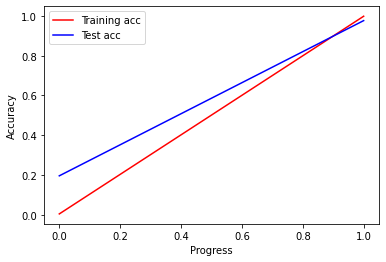

In [ ]:
history = model.fit(train_images, to_categorical(train_labels), batch_size = 32, validation_data=(test_images, to_categorical(test_labels)), epochs=100, verbose=1, callbacks=[f1, f2])
# batch size to liczba przez którą dzielony jest nasz zbiór (np. u na 60.000 / 32 = 1875)

#4
trained_model = load_model('model')

#5
train_accuracy = trained_model.evaluate(train_images, to_categorical(train_labels), verbose = 1)

#6
test_accuracy = trained_model.evaluate(test_images, to_categorical(test_labels), verbose = 1)

#8
print("Train acc: {tra}, Test acc: {tsa}".format(tra = train_accuracy, tsa = test_accuracy))
#9

pyplot.plot(train_accuracy, 'r', label='Training acc')
pyplot.plot(test_accuracy, 'b', label='Test acc')
pyplot.xlabel('Progress')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

Adam osiągnął maksymalne ACC po 11 epoce, natomiast Adadelta po 13 epoce zakończyła swoją naukę z nieznacznie większym wynikiem ACC rzędu 0.001. Różnica leży najpewniej w prędkości uczenia i tym jak dany algorytm ustala wagi dla każdej epoki.

### 📚 Zadanie 3.

Poniższy przykład ilustruje w jaki sposób możemy skorzystać z funkcji straty Root Mean Square Error (RMSE) dla dwóch zmiennych (y_true i y_pred).

In [ ]:
y_true = 43.2
y_pred = 4.2

In [ ]:
x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

39.0

Czasami jednak możemy chcieć stworzyć naszą własną funkcję straty (podajemy przy tym dwa argumenty, tj. y_true oraz y_pred).

In [ ]:
def custom_loss_function(y_true, y_pred):
    pass

##### Niekiedy przydaje nam się możliwość wprowadzenia modyfikacji do funkcji straty lub zbudowania własnej funkcji straty od postaw. W Keras/Tensorflow jest to dosyć prosta rzecz, którą możemy zrealizować za pomocą podstawowych operacji.
Odtwórz wskazaną wcześniej funkcję straty Root Mean Squared Error tworząc od podstaw nową funkcję.
##### Sometimes it is useful to modify the loss function or build your own loss function from scratch. In Keras / Tensorflow it is quite a simple operation.
Recreate the Root Mean Squared Error function shown earlier by creating a new function from scratch.

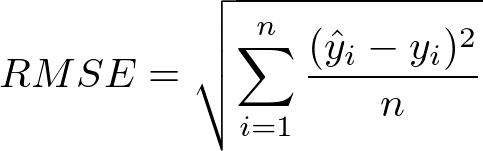

In [ ]:
def cf_rmse(y_true, y_pred):
    error = y_true - y_pred # w tym miejscu najpierw obliczamy różnicę między etykietą prawdziwą a przewidzianą
    sqr_error = error**2 # tutaj obliczamy kwadrat błędu
    mean_sqr_error =  np.mean(sqr_error) # dalej obliczamy średnią z kwadratu błędu
    sqrt_mean_sqr_error = mean_sqr_error**(1/2)# pierwiastek kwadratowy ze średniej kwadratu błędu
    return sqrt_mean_sqr_error # na koniec zwracamy odpowiednią informację

cf_rmse(y_true, y_pred)

39.0